# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../Output/cities.csv"

# Output File Path
output_path = "../Output/"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# NOTE: Adjusted the size to 2000 (from 1500) to get more samples,
# the loop is capped to get 600 samples
# When the samples are processed, data for some may not be returned and 
# we need 500 results. The API loop will be capped at 500.

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
    # Added logic - Exit if got 600 cities
    if len(cities) >= 600:
        break

# Print the city count to confirm sufficient count
print(len(cities))

600


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Begin data retreival 
print("Beginning Data Retrieval")
print('-----------------------------')

# Create Empty Lists 
cityid = []
city = []
cloudiness = []
country = []
weatherdate = []
humidity = []
lat = []
lng = []
maxtemp = []
windspeed = []

# Counter to record number of successful & error calls
success_count = 0
error_count = 0
total_count = 0

# Current date 
curdate =  datetime.now()

# Base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?q="
api = "&appid="

for i, c in enumerate(cities):
    # Establish URL
    url_w = base_url + c + api + weather_api_key
    
    # Print processing status 
    print("Processing Record # {} | City: {}".format(i+1, c))

    # Response
    response = requests.get(url_w)
    total_count = total_count + 1

    # Successful response
    if response.status_code == 200:
        # maintain success count 
        success_count = success_count + 1
        # establish lists for dataframe & plotting
        
        # city ID & city
        cityid.append(success_count)
        city.append(str(c))
        # cloudy
        cloudiness.append(response.json()['clouds']['all'])
        # country
        country.append(response.json()['sys']['country'])
        # date
        weatherdate.append(response.json()['dt'])
        # humidity 
        humidity.append(response.json()['main']['humidity'])
        # latitude 
        lat.append(response.json()['coord']['lat'])
        # longitude 
        lng.append(response.json()['coord']['lon'])
        # Max temperature
        temp_kel = response.json()['main']['temp_max']
        temp_fnh = (((temp_kel - 273.15) * 9/5) + 32)
        maxtemp.append(temp_fnh)
        # wind speed
        windspeed.append(response.json()['wind']['speed'])
    else:
        error_count = error_count  + 1
        print("City {} not found. Skipping... | Response: {}".format(c, response))

    # Check if 500 city records successfully processed - Skip if >= 500 (we only need data for 500 cities)
    if success_count >= 500:
        break

# End data retreival
print('-----------------------------')
print("Ending Data Retrieval")
print("Total numnber of records processed {}. Number of records in error: {}. Number of successful records {}".format(total_count,error_count,success_count))

Beginning Data Retrieval
-----------------------------
Processing Record # 1 | City: saleaula
City saleaula not found. Skipping... | Response: <Response [404]>
Processing Record # 2 | City: kruisfontein
Processing Record # 3 | City: victoria
Processing Record # 4 | City: mangan
Processing Record # 5 | City: port alfred
Processing Record # 6 | City: gilroy
Processing Record # 7 | City: mar del plata
Processing Record # 8 | City: jijiga
Processing Record # 9 | City: tuktoyaktuk
Processing Record # 10 | City: severo-kurilsk
Processing Record # 11 | City: sitka
Processing Record # 12 | City: ancud
Processing Record # 13 | City: bordighera
Processing Record # 14 | City: amderma
City amderma not found. Skipping... | Response: <Response [404]>
Processing Record # 15 | City: huarmey
Processing Record # 16 | City: buraydah
Processing Record # 17 | City: bredasdorp
Processing Record # 18 | City: saint-philippe
Processing Record # 19 | City: nishihara
Processing Record # 20 | City: bengkulu
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Convert to dataframe 

weatherdf = pd.DataFrame(list(zip(cityid, city, cloudiness, country, weatherdate, humidity, lat, lng, maxtemp, windspeed)), \
                        columns = ["City_ID", "City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"])

In [5]:
# describe dataframe 
weatherdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
City_ID       500 non-null int64
City          500 non-null object
Cloudiness    500 non-null int64
Country       500 non-null object
Date          500 non-null int64
Humidity      500 non-null int64
Lat           500 non-null float64
Lng           500 non-null float64
Max Temp      500 non-null float64
Wind Speed    500 non-null float64
dtypes: float64(4), int64(4), object(2)
memory usage: 39.2+ KB


In [6]:
# display the dataframe 
weatherdf.head(5)

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,1,kruisfontein,100,ZA,1580962731,87,-34.00,24.73,64.220,6.77
1,2,victoria,40,HK,1580962684,72,22.29,114.16,69.998,9.30
2,3,mangan,0,IN,1580962732,35,27.52,88.53,42.584,1.17
3,4,port alfred,100,ZA,1580962732,96,-33.59,26.89,68.000,1.79
4,5,gilroy,1,US,1580962732,74,37.01,-121.57,51.998,0.80


In [7]:
# output to csv
weatherdf.to_csv(path_or_buf = output_data_file, index = False, header = True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

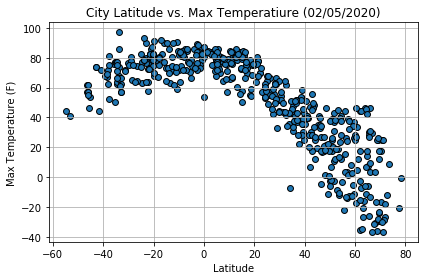

In [25]:
weatherdf.plot.scatter(x = 'Lat', y = 'Max Temp', c= 'tab:blue', edgecolors = 'black', s = 35)
plt.title('City Latitude vs. Max Temperatiure (' + curdate.strftime("%m/%d/%Y") + ')')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.tight_layout()
filename = 'Fig1.png'
# Save 
plt.savefig(output_path + filename)
# Show
plt.show()

#### Latitude vs. Humidity Plot

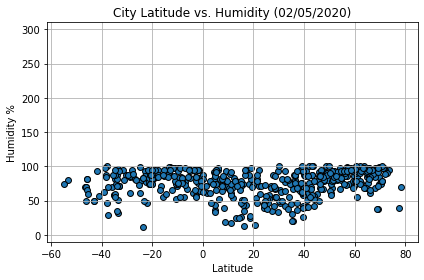

In [26]:
weatherdf.plot.scatter(x = 'Lat', y = 'Humidity', c= 'tab:blue', edgecolors = 'black', s = 35)
plt.title('City Latitude vs. Humidity (' + curdate.strftime("%m/%d/%Y") + ')')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.ylim([-10,310])
plt.grid()
plt.tight_layout()
filename = 'Fig2.png'
# Save 
plt.savefig(output_path + filename)
# Show
plt.show()

#### Latitude vs. Cloudiness Plot

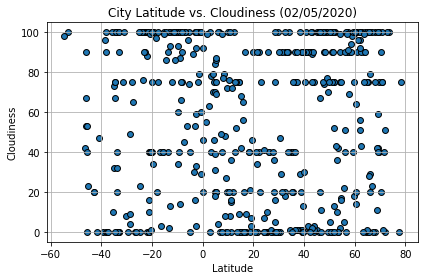

In [27]:
weatherdf.plot.scatter(x = 'Lat', y = 'Cloudiness', c= 'tab:blue', edgecolors = 'black', s = 35)
plt.title('City Latitude vs. Cloudiness (' + curdate.strftime("%m/%d/%Y") + ')')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.tight_layout()
filename = 'Fig3.png'
# Save 
plt.savefig(output_path + filename)
# Show
plt.show()

#### Latitude vs. Wind Speed Plot

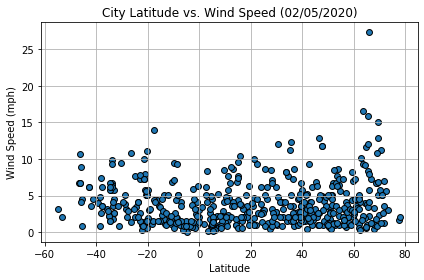

In [28]:
weatherdf.plot.scatter(x = 'Lat', y = 'Wind Speed', c= 'tab:blue', edgecolors = 'black', s = 35)
plt.title('City Latitude vs. Wind Speed (' + curdate.strftime("%m/%d/%Y") + ')')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.tight_layout()
filename = 'Fig4.png'
# Save 
plt.savefig(output_path + filename)
# Show
plt.show()

## Linear Regression

In [29]:
# OPTIONAL: Create a function to create Linear Regression plots
### Note: Skipping function as plt.show() does not work great in jupyter lab if all plot code is not togther 

In [30]:
# Create Northern and Southern Hemisphere DataFrames
northern_h_df = weatherdf[weatherdf['Lat'] > 0]
southern_h_df = weatherdf[weatherdf['Lat'] < 0]

In [31]:
# Display northern hemisphere dataframe
northern_h_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,2,victoria,40,HK,1580962684,72,22.29,114.16,69.998,9.30
2,3,mangan,0,IN,1580962732,35,27.52,88.53,42.584,1.17
4,5,gilroy,1,US,1580962732,74,37.01,-121.57,51.998,0.80
6,7,jijiga,0,ET,1580962732,71,9.35,42.80,57.398,2.84
7,8,tuktoyaktuk,40,CA,1580962732,74,69.45,-133.04,-23.800,5.10
...,...,...,...,...,...,...,...,...,...,...
490,491,songjianghe,0,CN,1580962786,56,42.19,127.48,7.070,1.96
492,493,nyurba,0,RU,1580962786,97,63.28,118.33,-26.320,1.62
496,497,paducah,90,US,1580962787,93,37.08,-88.60,37.994,2.10
498,499,leningradskiy,100,RU,1580962787,97,69.38,178.42,-22.990,6.81


In [32]:
# Display southern hemisphere dataframe
southern_h_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,1,kruisfontein,100,ZA,1580962731,87,-34.00,24.73,64.220,6.77
3,4,port alfred,100,ZA,1580962732,96,-33.59,26.89,68.000,1.79
5,6,mar del plata,90,AR,1580962732,100,-38.00,-57.56,71.996,2.60
10,11,ancud,0,CL,1580962732,93,-41.87,-73.82,44.600,3.60
12,13,huarmey,100,PE,1580962733,71,-10.07,-78.15,72.842,1.39
...,...,...,...,...,...,...,...,...,...,...
491,492,yurimaguas,96,PE,1580962786,85,-5.90,-76.08,76.280,0.78
493,494,waingapu,60,ID,1580962786,76,-9.66,120.26,84.128,7.07
494,495,vila velha,40,BR,1580962786,88,-20.33,-40.29,78.800,1.50
495,496,mbanza-ngungu,74,CD,1580962787,94,-5.25,14.87,66.236,0.89


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7470804165862043


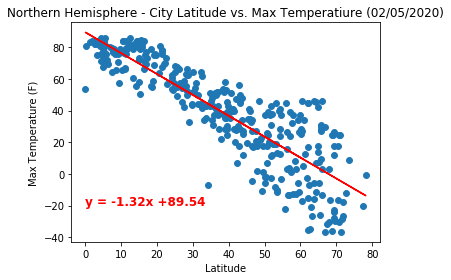

In [33]:
# Regrssion line calculation 
slope, intercept, r_value, p_value, std_err = linregress(northern_h_df['Lat'],northern_h_df['Max Temp'])
# linear regression line
x = northern_h_df['Lat']
y_pred = intercept + slope * x
regression_text = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
# Print coefficient of determination (r_squared)
print("The r-squared is: {}".format(r_value**2))
# Scatter plot linear regression line
northern_h_df.plot.scatter(x = 'Lat', y = 'Max Temp', s = 35)
plt.plot(x,y_pred, color="red")
plt.text(0, -20, regression_text, color = 'red', fontsize = 12, fontweight = 'bold')

plt.title('Northern Hemisphere - City Latitude vs. Max Temperatiure (' + curdate.strftime("%m/%d/%Y") + ')')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.tight_layout()
filename = '/Northern_Hemisphere/North_Fig1.png'
# Save 
plt.savefig(output_path + filename)
# Show
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3146433517295881


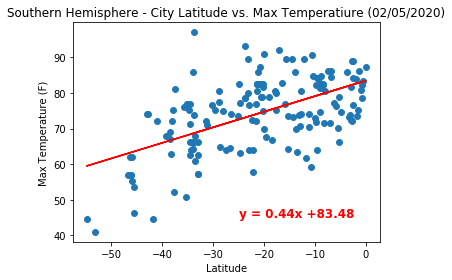

In [34]:
# Regrssion line calculation 
slope, intercept, r_value, p_value, std_err = linregress(southern_h_df['Lat'],southern_h_df['Max Temp'])
# linear regression line
x = southern_h_df['Lat']
y_pred = intercept + slope * x
regression_text = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
# Print coefficient of determination (r_squared)
print("The r-squared is: {}".format(r_value**2))
# Scatter plot with regression line 
southern_h_df.plot.scatter(x = 'Lat', y = 'Max Temp', s = 35)
plt.plot(x,y_pred, color="red")
plt.text(-25, 45, regression_text, color = 'red', fontsize = 12, fontweight = 'bold')

plt.title('Southern Hemisphere - City Latitude vs. Max Temperatiure (' + curdate.strftime("%m/%d/%Y") + ')')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.tight_layout()
filename = '/Southern_Hemisphere/South_Fig1.png'
# Save 
plt.savefig(output_path + filename)
# Show
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1341611249411798


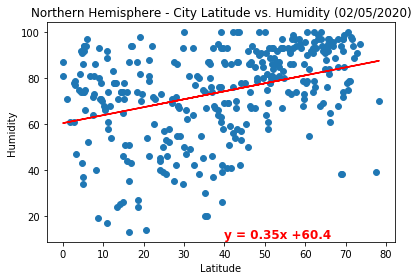

In [35]:
# Regrssion line calculation 
slope, intercept, r_value, p_value, std_err = linregress(northern_h_df['Lat'],northern_h_df['Humidity'])
# linear regression line
x = northern_h_df['Lat']
y_pred = intercept + slope * x
regression_text = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
# Print coefficient of determination (r_squared)
print("The r-squared is: {}".format(r_value**2))
# Scatter plot with regression line 
northern_h_df.plot.scatter(x = 'Lat', y = 'Humidity', s = 35)
plt.plot(x,y_pred, color="red")
plt.text(40, 10, regression_text, color = 'red', fontsize = 12, fontweight = 'bold')

plt.title('Northern Hemisphere - City Latitude vs. Humidity (' + curdate.strftime("%m/%d/%Y") + ')')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.tight_layout()
filename = 'Northern_Hemisphere/North_Fig2.png'
# Save 
plt.savefig(output_path + filename)
# Show
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.04524748320207044


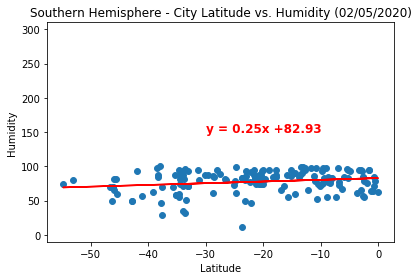

In [36]:
# Regrssion line calculation 
slope, intercept, r_value, p_value, std_err = linregress(southern_h_df['Lat'],southern_h_df['Humidity'])
# linear regression line
x = southern_h_df['Lat']
y_pred = intercept + slope * x
regression_text = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
# Print coefficient of determination (r_squared)
print("The r-squared is: {}".format(r_value**2))
# Scatter plot with regression line 
southern_h_df.plot.scatter(x = 'Lat', y = 'Humidity', s = 35)
plt.plot(x,y_pred, color="red")
plt.text(-30, 150, regression_text, color = 'red', fontsize = 12, fontweight = 'bold')

plt.title('Southern Hemisphere - City Latitude vs. Humidity (' + curdate.strftime("%m/%d/%Y") + ')')
plt.ylim([-10,310])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.tight_layout()
filename = 'Southern_Hemisphere/South_Fig2.png'
# Save 
plt.savefig(output_path + filename)
# Show
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.041229212959220066


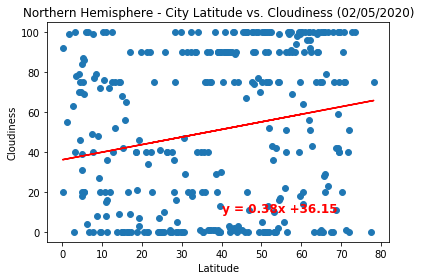

In [37]:
# Regrssion line calculation 
slope, intercept, r_value, p_value, std_err = linregress(northern_h_df['Lat'],northern_h_df['Cloudiness'])
# linear regression line
x = northern_h_df['Lat']
y_pred = intercept + slope * x
regression_text = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
# Print coefficient of determination (r_squared)
print("The r-squared is: {}".format(r_value**2))
# Scatter plot linear regression line
northern_h_df.plot.scatter(x = 'Lat', y = 'Cloudiness', s = 35)
plt.plot(x,y_pred, color="red")
plt.text(40, 10, regression_text, color = 'red', fontsize = 12, fontweight = 'bold')

plt.title('Northern Hemisphere - City Latitude vs. Cloudiness (' + curdate.strftime("%m/%d/%Y") + ')')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.tight_layout()
filename = 'Northern_Hemisphere/North_Fig3.png'
# Save 
plt.savefig(output_path + filename)
# Show
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06256239049394045


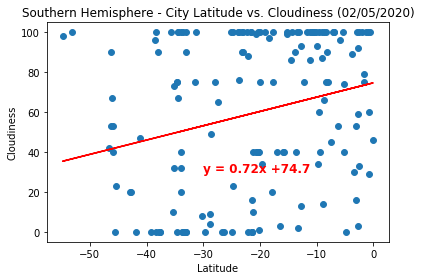

In [38]:
# Regrssion line calculation 
slope, intercept, r_value, p_value, std_err = linregress(southern_h_df['Lat'],southern_h_df['Cloudiness'])
# linear regression line
x = southern_h_df['Lat']
y_pred = intercept + slope * x
regression_text = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
# Print coefficient of determination (r_squared)
print("The r-squared is: {}".format(r_value**2))
# Scatter plot linear regression line
southern_h_df.plot.scatter(x = 'Lat', y = 'Cloudiness', s = 35)
plt.plot(x,y_pred, color="red")
plt.text(-30, 30, regression_text, color = 'red', fontsize = 12, fontweight = 'bold')

plt.title('Southern Hemisphere - City Latitude vs. Cloudiness (' + curdate.strftime("%m/%d/%Y") + ')')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.tight_layout()
filename = 'Southern_Hemisphere/South_Fig3.png'
# Save 
plt.savefig(output_path + filename)
# Show
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03273280421489593


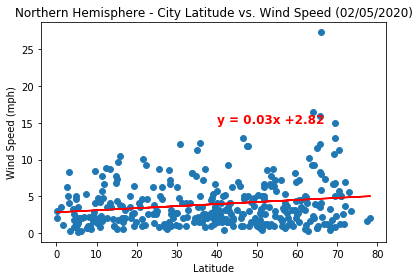

In [39]:
# Regrssion line calculation 
slope, intercept, r_value, p_value, std_err = linregress(northern_h_df['Lat'],northern_h_df['Wind Speed'])
# linear regression line
x = northern_h_df['Lat']
y_pred = intercept + slope * x
regression_text = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
# Print coefficient of determination (r_squared)
print("The r-squared is: {}".format(r_value**2))
# Scatter plot linear regression line
northern_h_df.plot.scatter(x = 'Lat', y = 'Wind Speed', s = 35)
plt.plot(x,y_pred, color="red")
plt.text(40, 15, regression_text, color = 'red', fontsize = 12, fontweight = 'bold')

plt.title('Northern Hemisphere - City Latitude vs. Wind Speed (' + curdate.strftime("%m/%d/%Y") + ')')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.tight_layout()
filename = 'Northern_Hemisphere/North_Fig4.png'
# Save 
plt.savefig(output_path + filename)
# Show
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.10723035568510147


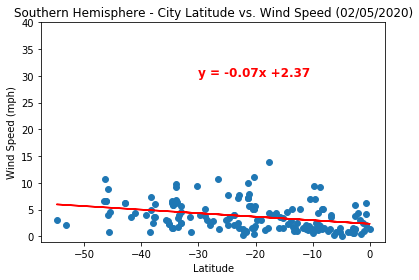

In [41]:
# Regrssion line calculation 
slope, intercept, r_value, p_value, std_err = linregress(southern_h_df['Lat'],southern_h_df['Wind Speed'])
# linear regression line
x = southern_h_df['Lat']
y_pred = intercept + slope * x
regression_text = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
# Print coefficient of determination (r_squared)
print("The r-squared is: {}".format(r_value**2))
# Scatter plot linear regression line
southern_h_df.plot.scatter(x = 'Lat', y = 'Wind Speed', s = 35)
plt.plot(x,y_pred, color="red")
plt.text(-30, 30, regression_text, color = 'red', fontsize = 12, fontweight = 'bold')

plt.title('Southern Hemisphere - City Latitude vs. Wind Speed (' + curdate.strftime("%m/%d/%Y") + ')')
plt.ylim(-1, 40)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.tight_layout()
filename = 'Southern_Hemisphere/South_Fig4.png'
# Save 
plt.savefig(output_path + filename)
# Show
plt.show()